In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
df_2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# Question 1: What does happiness index look like across the world?

In [5]:
fig = px.choropleth(locations=df_2021['Country name'], locationmode="country names", color=df_2021['Ladder score'],
                    labels = {'color':'Score'},color_continuous_scale = 'Blues')
fig.update_layout(title='Happiness Index Across the World',title_x=0.5)
fig.show()


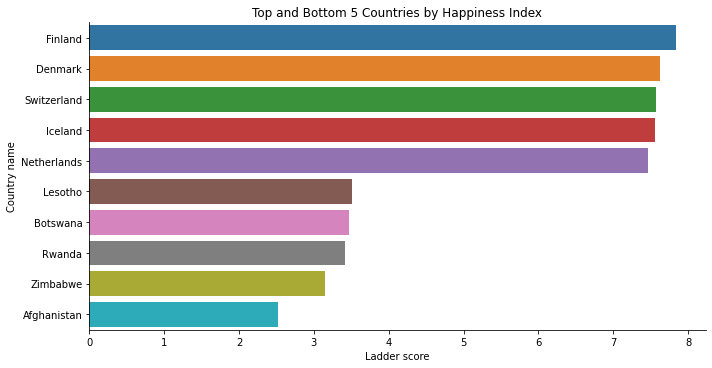

In [6]:
sort = df_2021.sort_values('Ladder score',ascending=False)
sns.catplot(y='Country name',x='Ladder score',data=sort.head().append(sort.tail()),kind='bar',height=5, aspect=2).set(title='Top and Bottom 5 Countries by Happiness Index')

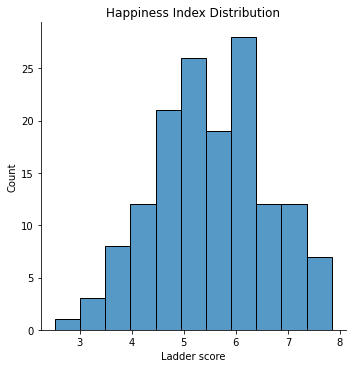

In [7]:
sns.displot(data=df_2021,x='Ladder score').set(title='Happiness Index Distribution')

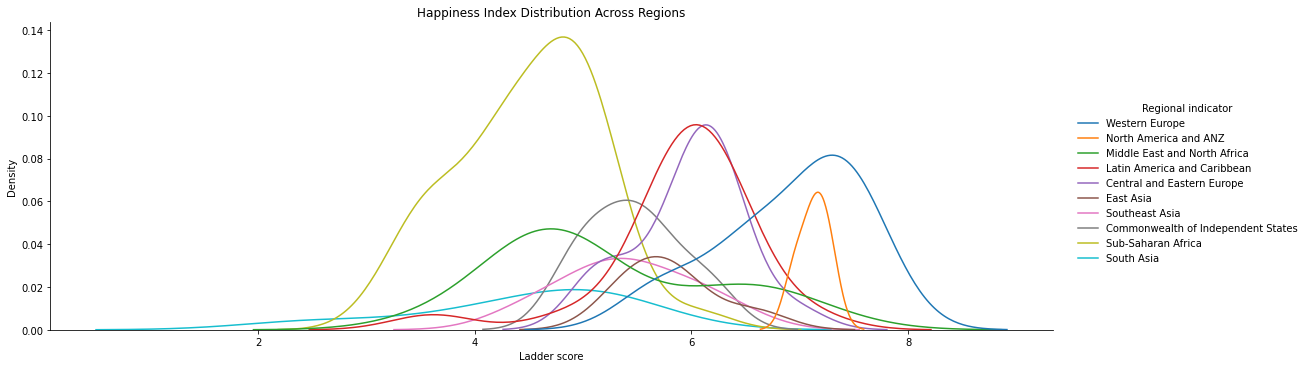

In [8]:
sns.displot(data=df_2021,x='Ladder score',hue='Regional indicator',kind='kde',aspect=3).set(title='Happiness Index Distribution Across Regions')

In [9]:
region = df_2021.groupby('Regional indicator').mean().reset_index().sort_values('Ladder score',ascending=False)

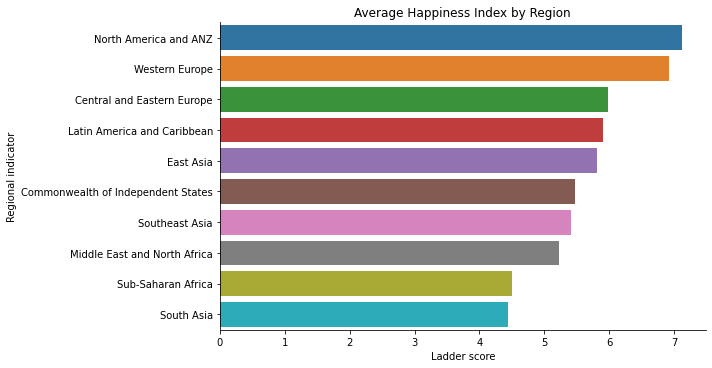

In [10]:
sns.catplot(y='Regional indicator',x='Ladder score',data=region,kind='bar',height=5, aspect=2).set(title='Average Happiness Index by Region')

<AxesSubplot:xlabel='year', ylabel='Life Ladder'>

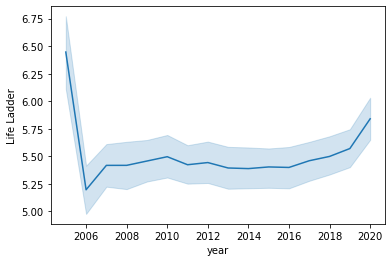

In [11]:
sns.lineplot(data=df,x="year",y="Life Ladder")

In [12]:
px.line(df,x='year',y='Life Ladder',color='Country name',height=750)

In [13]:
df = df_2021.iloc[:,np.r_[1,6:12]].rename(columns={"Regional indicator":"group"}).groupby('group').mean().reset_index()

df

,group,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Central and Eastern Europe,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529
1,Commonwealth of Independent States,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083
2,East Asia,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333
3,Latin America and Caribbean,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600
4,Middle East and North Africa,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235
5,North America and ANZ,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250
6,South Asia,8.682571,0.703429,62.681000,0.765000,0.042714,0.797429
7,Southeast Asia,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111
8,Sub-Saharan Africa,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944
9,Western Europe,10.822714,0.914476,73.033095,0.858714,-0.003190,0.523095


In [14]:
df = df_2021.iloc[:,np.r_[1,6:12]].rename(columns={"Regional indicator":"group"}).groupby('group').mean().reset_index()
group = df.group
df.drop(columns='group',inplace = True)
normalize_df=(df-df.min())/(df.max()-df.min())
df = normalize_df
df['group'] = group
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,group,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Central and Eastern Europe,0.740255,0.805330,0.726204,0.418576,0.003488,1.000000
1,Commonwealth of Independent States,0.482850,0.742344,0.532060,0.521718,0.185367,0.687385
2,East Asia,0.834379,0.691658,0.896135,0.244271,0.073831,0.583342
3,Latin America and Caribbean,0.471263,0.602957,0.652582,0.598763,0.051100,0.855638
4,Middle East and North Africa,0.579040,0.426176,0.567030,0.000000,0.000000,0.779968
5,North America and ANZ,0.995190,1.000000,0.958704,0.946761,0.846109,0.000000
6,South Asia,0.221064,0.028209,0.396260,0.252062,0.518763,0.867671
7,Southeast Asia,0.489987,0.521999,0.525000,1.000000,1.000000,0.647581
8,Sub-Saharan Africa,0.000000,0.000000,0.000000,0.034924,0.394790,0.789212
9,Western Europe,1.000000,0.919646,1.000000,0.738815,0.324332,0.184024


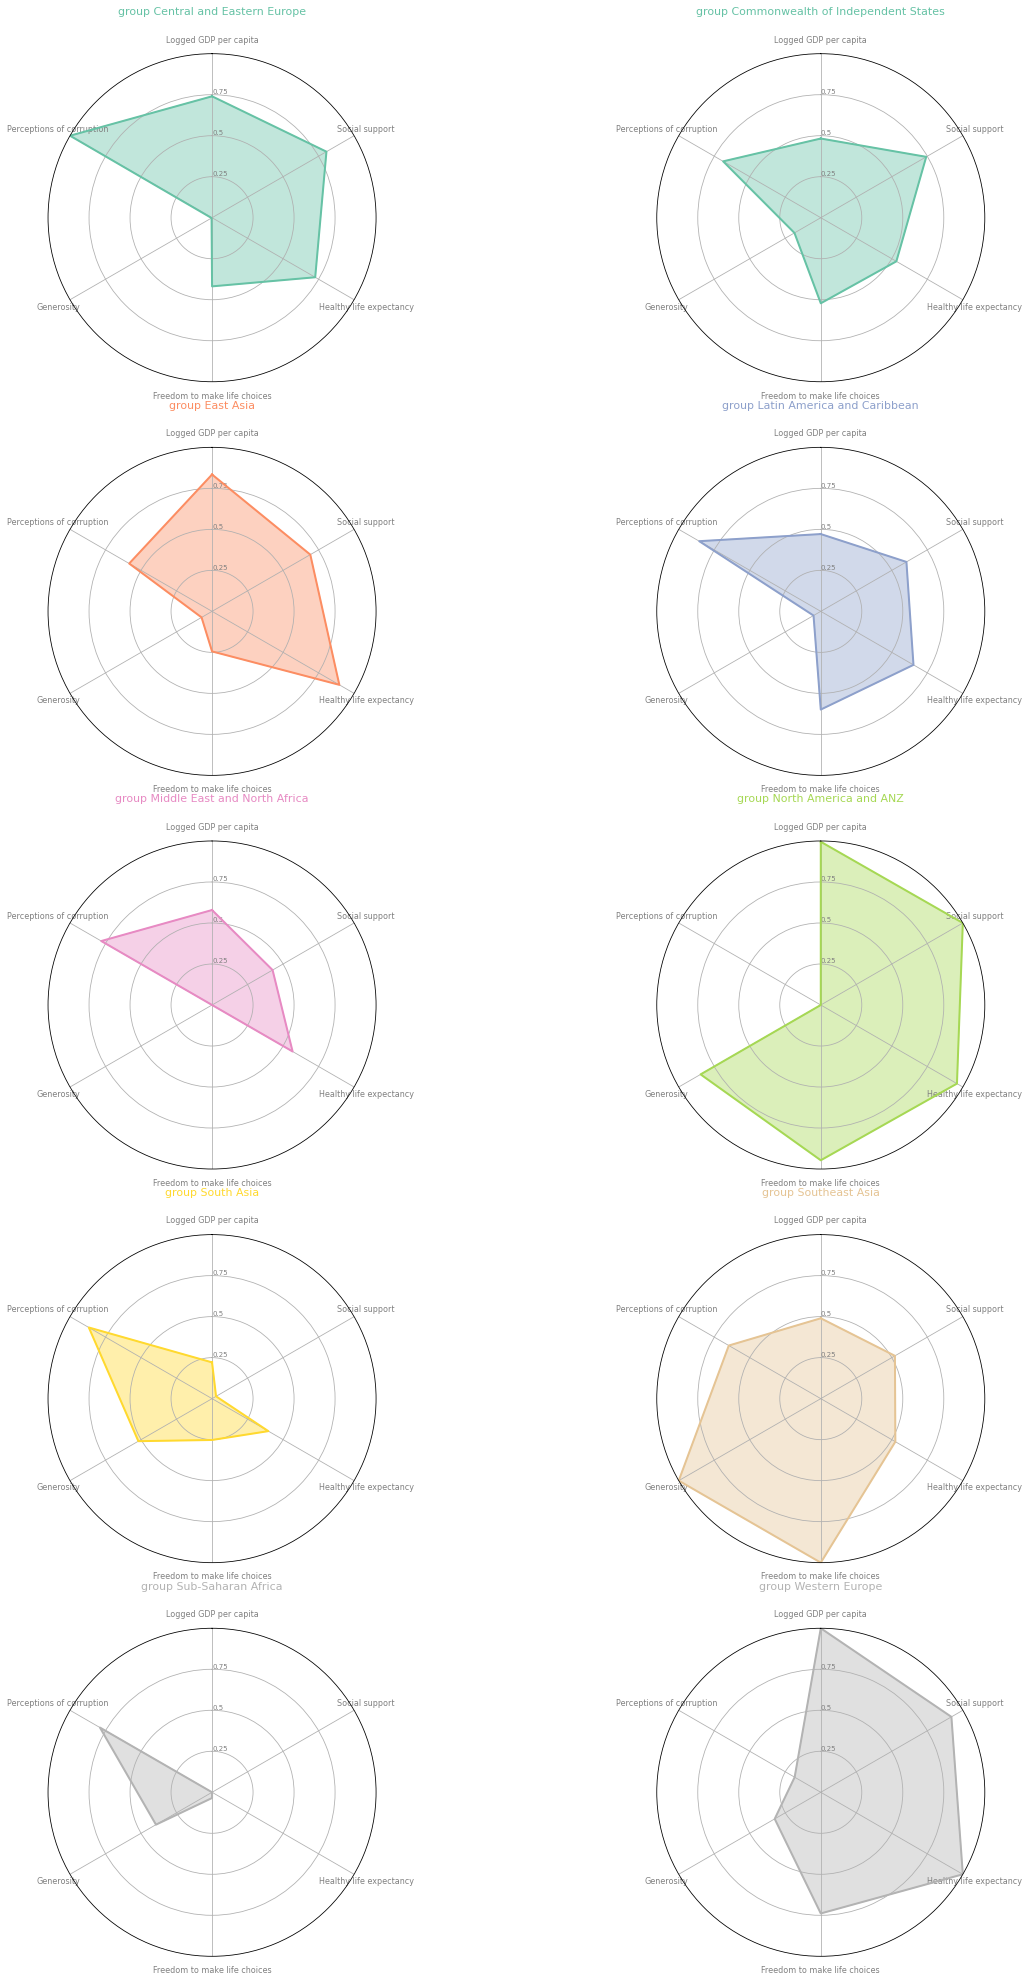

In [15]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(5,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=5, 
#                     hspace=10)
# my_dpi=100
plt.figure(figsize=(20,35))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))

In [16]:
df= pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

# Question 2: What affects happiness index?
